In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data = pd.read_csv('netflix_titles.csv')

In [3]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
data.shape

(6234, 12)

In [5]:
data.describe()

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [7]:
data.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

**Data Cleaning**

In [8]:
data.drop(['director','cast'],axis =1, inplace=True)

In [9]:
data['country'].value_counts()

United States                     2032
India                              777
United Kingdom                     348
Japan                              176
Canada                             141
                                  ... 
Czech Republic, France               1
United Kingdom, Spain, Belgium       1
China, United States                 1
Iran, France                         1
Chile, France                        1
Name: country, Length: 554, dtype: int64

In [10]:
#change Nan in country to UNited States
data['country'].replace(np.nan,"United States", inplace =True)

In [11]:
data['date_added'].value_counts()

January 1, 2020       122
November 1, 2019       94
March 1, 2018          78
December 31, 2019      74
October 1, 2018        72
                     ... 
June 28, 2018           1
 September 4, 2017      1
February 19, 2016       1
 April 16, 2019         1
December 13, 2016       1
Name: date_added, Length: 1524, dtype: int64

In [12]:
data = data.dropna(subset=['date_added'])


In [13]:
data['rating'].fillna(str(data['rating'].mode().values[0]),inplace=True)

In [14]:
data.isnull().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
data.shape

(6223, 10)

In [15]:
data['type'].value_counts()

Movie      4264
TV Show    1959
Name: type, dtype: int64

In [16]:
data['rating'].value_counts()

TV-MA       2034
TV-14       1695
TV-PG        699
R            508
PG-13        286
NR           217
PG           184
TV-Y7        168
TV-G         149
TV-Y         142
TV-Y7-FV      95
G             37
UR             7
NC-17          2
Name: rating, dtype: int64

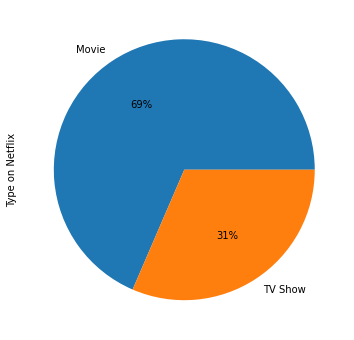

In [21]:
plt.figure(figsize=(15,6))
data['type'].value_counts().plot(kind='pie', label="Type on Netflix",autopct='%1.0f%%')

Text(0.5, 1.0, 'Rating on Netflix')

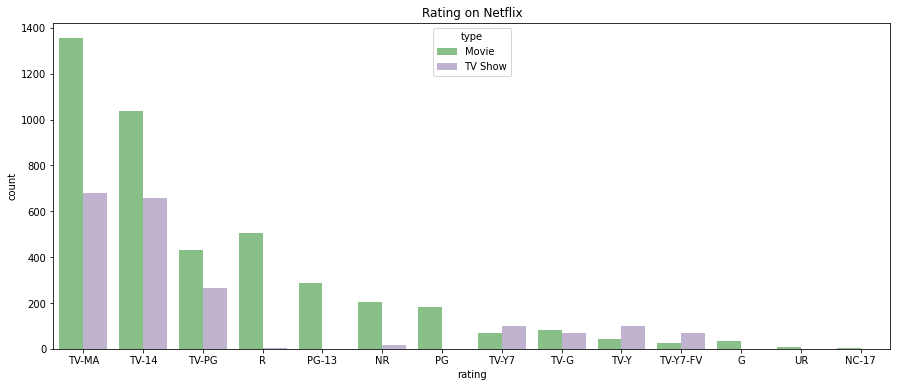

In [35]:
plt.figure(figsize = (15,6))
sns.countplot(x = "rating", order=data['rating'].value_counts().index[0:15] ,data=data,palette='Accent',hue='type')
plt.title("Rating on Netflix")

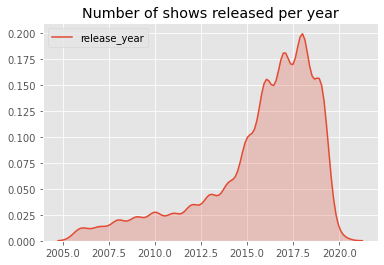

In [62]:
data_year = data[data['release_year'] > 2005]
sns.kdeplot(data=data_year['release_year'], label='release_year', shade=True)
plt.title('Number of shows released per year')
plt.show()

In [74]:
data_country = data['country'].value_counts()[:10]
data_country

United States     2500
India              777
United Kingdom     347
Japan              175
Canada             141
South Korea        136
Spain              117
France              90
Mexico              83
Turkey              79
Name: country, dtype: int64

Text(0.5, 1.0, 'top 10 country on Netflix')

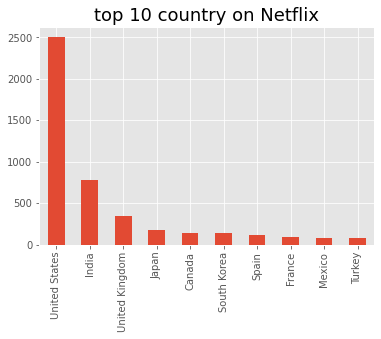

In [83]:
plt.style.use('ggplot')
ax = data_country.plot(kind='bar');
ax.set_alpha(0.8)
ax.set_title("top 10 country on Netflix", fontsize=18)


In [76]:
data_listed_in = data['listed_in'].value_counts()[:10]
data_listed_in

Documentaries                                       299
Stand-Up Comedy                                     273
Dramas, International Movies                        248
Dramas, Independent Movies, International Movies    186
Comedies, Dramas, International Movies              174
Kids' TV                                            158
Documentaries, International Movies                 150
Children & Family Movies, Comedies                  129
Comedies, International Movies                      120
Children & Family Movies                            120
Name: listed_in, dtype: int64

Text(0.5, 1.0, 'top 10 Listed in Netflix')

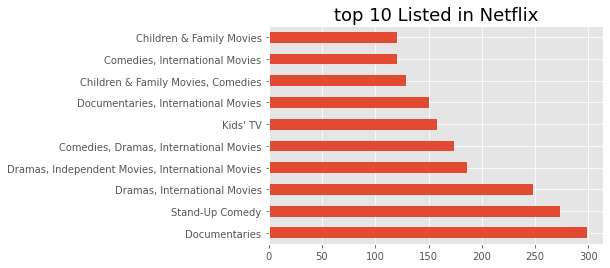

In [82]:
plt.style.use('ggplot')
ax = data_listed_in.plot(kind='barh');
ax.set_alpha(0.8)
ax.set_title("top 10 Listed in Netflix", fontsize=18)
